# Đọc dữ liệu

In [6]:
folder = r'F:\UEH\Năm 3\Lập trình phân tích dữ liệu\Cuối kỳ\Final-LTPTDL'

In [7]:
import pandas as pd

df_node = pd.read_excel(folder+'\graph.xlsx',sheet_name='Nodes')
df_edge = pd.read_excel(folder+'\graph.xlsx',sheet_name='Edges')

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
C:\Users\The Anh\AppData\Local\Temp\ipykernel_13684\4126038405.py:3: SyntaxWarning: invalid escape sequence '\g'
  df_node = pd.read_excel(folder+'\graph.xlsx',sheet_name='Nodes')
C:\Users\The Anh\AppData\Local\Temp\ipykernel_13684\4126038405.py:4: SyntaxWarning: invalid escape sequence '\g'
  df_edge = pd.read_excel(folder+'\graph.xlsx',sheet_name='Edges')


In [8]:
df_node.head()

,id,name_nodes,h
0,0,A,14
1,1,B,0
2,2,C,15
3,3,D,6
4,4,E,8


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(df_node,df_edge):
    G = nx.DiGraph()
    # Thêm các đỉnh
    nodes = df_node['name_nodes'].tolist()
    G.add_nodes_from(nodes)
    # Thêm các cạnh và trọng số
    edges = [(row['node_start'], row['node_end'], row['weight']) for _, row in df_edge.iterrows()]
    G.add_weighted_edges_from(edges)

    # Tọa độ của các đỉnh
    pos = {
        'A': (2, 3),
        'B': (2, -3),
        'C': (0, 2),
        'D': (1, 1),
        'E': (2.5, 0.5),
        'F': (3, 2),
        'G': (3.2, 0.5),
        'H': (0, -2),
        'I': (2.5, -2),
        'K': (1, -1.5),
    }
    return G,pos

In [10]:
graph,pos = create_graph(df_node,df_edge)

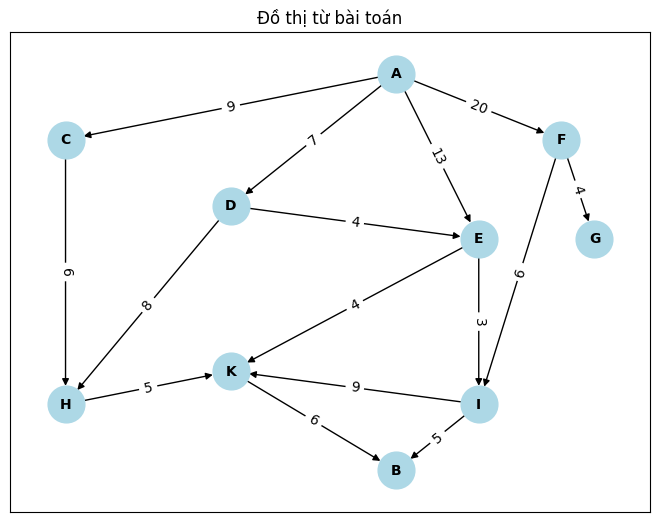

In [11]:
# Vẽ đồ thị
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Hiển thị đồ thị
plt.title("Đồ thị từ bài toán")
plt.axis('on')  # Giữ tỷ lệ giữa các trục
plt.show()


# Hàm trả về đường đi

In [12]:
def path(distances,start, end):
    # Lưu đường đi từ đích tới điểm bắt đầu
    path = []
    # Node đầu tiên là đích
    node = end
    # Duyệt cho tới khi về lại điểm bắt đầu
    while node != start:
        path.append(node)
    # Node tiếp theo là node có gần node trước đó
        node = distances[node][1]
    # Thêm node bắt đầu
    path.append(start)
    # Đảo ngược danh sách để có đường đi từ điểm bắt đầu tới đích
    path = path[::-1]
    p = ' -> '.join(path)
    # Chi phí tới đỉnh đích
    cost = distances[end][0]
    print(f'Path: {p}')
    print(f'Cost: {cost}')
    return

# Thuật toán Dijkstra

In [13]:
import heapq

def dijkstra(graph, start, end):
    # Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    distances = {node: (float('infinity'),None) for node in graph.nodes}
    # Khoảng cách từ đỉnh bắt đầu tới chính nó thì bằng 0
    distances[start] = (0,None)
    # Khởi tạo danh sách khoảng cách
    list_distances = [(0, start)]
    # Danh sách các đỉnh đã duyệt
    closed = []
    # Danh sách lưu đường đi
    while list_distances:
        current_distance, current_node = heapq.heappop(list_distances)
        closed.append(current_node)

        # Nếu khoảng cách hiện tại lớn hơn khoảng cách đã tìm thấy, bỏ qua đỉnh
        if current_distance > distances[current_node][0]:
            continue
      
        # Duyệt qua các cạnh của đỉnh hiện tại
        for neighbor in graph.neighbors(current_node):
          if neighbor not in closed:
            # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
            distance = current_distance + graph[current_node][neighbor]['weight']
          else:
            continue

            # Nếu khoảng cách mới nhỏ hơn khoảng cách đã tìm thấy, cập nhật
          if distance < distances[neighbor][0]:
                distances[neighbor] = (distance,current_node)
                heapq.heappush(list_distances, (distance, neighbor))

        print(distances)
        print(list_distances)
        print(closed)
        print('-'*40)
    return path(distances=distances,start=start,end=end)

In [14]:
dijkstra(graph, 'A','B')

{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'F': (20, 'A'), 'G': (inf, None), 'H': (inf, None), 'K': (inf, None), 'I': (inf, None)}
[(7, 'D'), (13, 'E'), (9, 'C'), (20, 'F')]
['A']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(9, 'C'), (11, 'E'), (20, 'F'), (15, 'H'), (13, 'E')]
['A', 'D']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (inf, None), 'I': (inf, None)}
[(11, 'E'), (13, 'E'), (20, 'F'), (15, 'H')]
['A', 'D', 'C']
----------------------------------------
{'A': (0, None), 'B': (inf, None), 'C': (9, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'F': (20, 'A'), 'G': (inf, None), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
[(13, 'E'), (14, 'I'), (20, 'F'), (

# A*

In [15]:
# Heuristic
h = df_node.set_index('name_nodes')['h'].to_dict()

In [16]:
dict_distances = {node:(graph['A'][node]['weight'],'A') for node in graph.neighbors('A')}
dict_distances

{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (13, 'A')}

In [17]:
def Astar(graph,start,end,heuristic):
# Khởi tạo khoảng cách từ đỉnh bắt đầu đến tất cả các đỉnh
    dict_distances = {node:(graph[start][node]['weight'],start) for node in graph.neighbors(start)}
    # Khoảng cách từ đỉnh bắt đầu tới chính nó thì bằng 0
    dict_distances[start] = (0,start)
    # Khởi tạo danh sách trạng thái
    open_list = [(0,start)]
    # Danh sách các đỉnh đã duyệt
    closed_list = []
    # Danh sách lưu đường đi
    while True:
      # Chọn node trong open list
        current_distance,current_node = heapq.heappop(open_list)
        print(current_node, current_distance)
      # Di chuyển node vào closed list
        closed_list.append(current_node)
        if current_node == end:
            print(open_list)
            print(dict_distances)
            print('-'*40)
            print('Đã tìm thấy đường đi:')
            path(distances=dict_distances,start=start,end=end)
            break
        else:
            for neighbor in graph.neighbors(current_node):

              # Tính khoảng cách từ đỉnh hiện tại đến đỉnh láng giềng
              # g(v) = g(u)+(u,v)
              g = dict_distances[current_node][0] + graph[current_node][neighbor]['weight']
              h = heuristic[neighbor]
              # f(v) = g(v) + h(v)
              f = g + h

              # Kiểm tra xem node(v) kề có nằm trong open_list hay chưa
              if neighbor not in [node for _, node in open_list]: # chưa
              # Thêm node kề và f vào
                heapq.heappush(open_list,(f,neighbor))
              # Cập nhật g(v)
                dict_distances[neighbor] = (g,current_node)
              else:
                # Nếu node(v) đã từng được duyệt
                # Nều mà g(v) mới tốt hơn (ngắn hơn) g(v) cũ thì cập nhật
                if g < dict_distances[neighbor][0]:
                  # Xóa f(v) cũ
                  open_list.remove((dict_distances[neighbor][0]+h, neighbor))
                # Cập nhật f(v) và g(v)
                heapq.heappush(open_list,(f,neighbor))
                dict_distances[neighbor] = (g,current_node)
        if not open_list:
            print('Không tìm thấy đường đi:')
            break
        print(open_list) # lưu f()
        print(dict_distances) # lưu g()
        print('-'*40)
    return

In [18]:
Astar(graph, 'A','B',h)

A 0
[(13, 'D'), (21, 'E'), (24, 'C'), (27, 'F')]
{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (13, 'A'), 'A': (0, 'A')}
----------------------------------------
D 13
[(19, 'E'), (25, 'H'), (27, 'F'), (24, 'C')]
{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'A': (0, 'A'), 'H': (15, 'D')}
----------------------------------------
E 19
[(17, 'K'), (18, 'I'), (27, 'F'), (25, 'H'), (24, 'C')]
{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'A': (0, 'A'), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E')}
----------------------------------------
K 17
[(18, 'I'), (21, 'B'), (27, 'F'), (25, 'H'), (24, 'C')]
{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'A': (0, 'A'), 'H': (15, 'D'), 'K': (15, 'E'), 'I': (14, 'E'), 'B': (21, 'K')}
----------------------------------------
I 18
[(19, 'B'), (24, 'C'), (25, 'H'), (25, 'K'), (27, 'F')]
{'C': (9, 'A'), 'F': (20, 'A'), 'D': (7, 'A'), 'E': (11, 'D'), 'A': (0, 'A'), 'H': (15, 'D'), 'K': (23, 'I'), 'I':